In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [16]:
df = pd.read_csv('datasets/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
print("Number of Null Value:\n")
print(df.isnull().sum())
print("\n"f"Number of duplicates: {df.duplicated().sum()}")

Number of Null Value:

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Number of duplicates: 0


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [19]:
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

Exploratory Data analysis

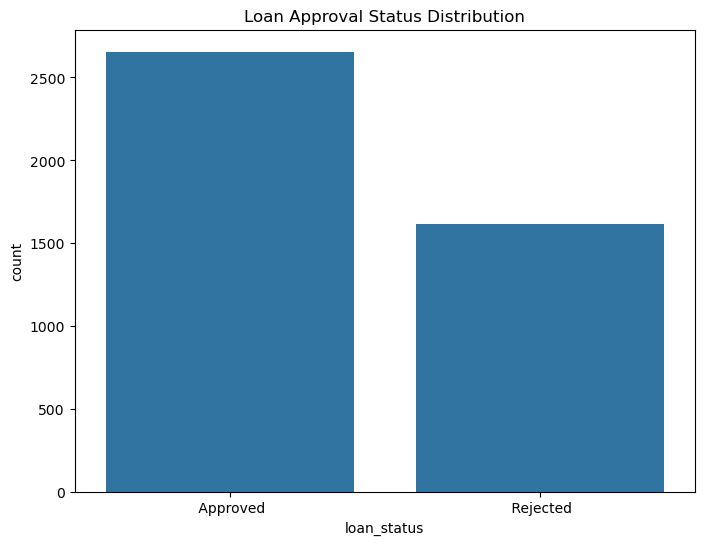

 Approved    62.215976
 Rejected    37.784024
Name: loan_status, dtype: float64


In [23]:
# Loan status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Loan Approval Status Distribution')
plt.show()

# Percentage distribution
print(df['loan_status'].value_counts(normalize=True) * 100)

       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637

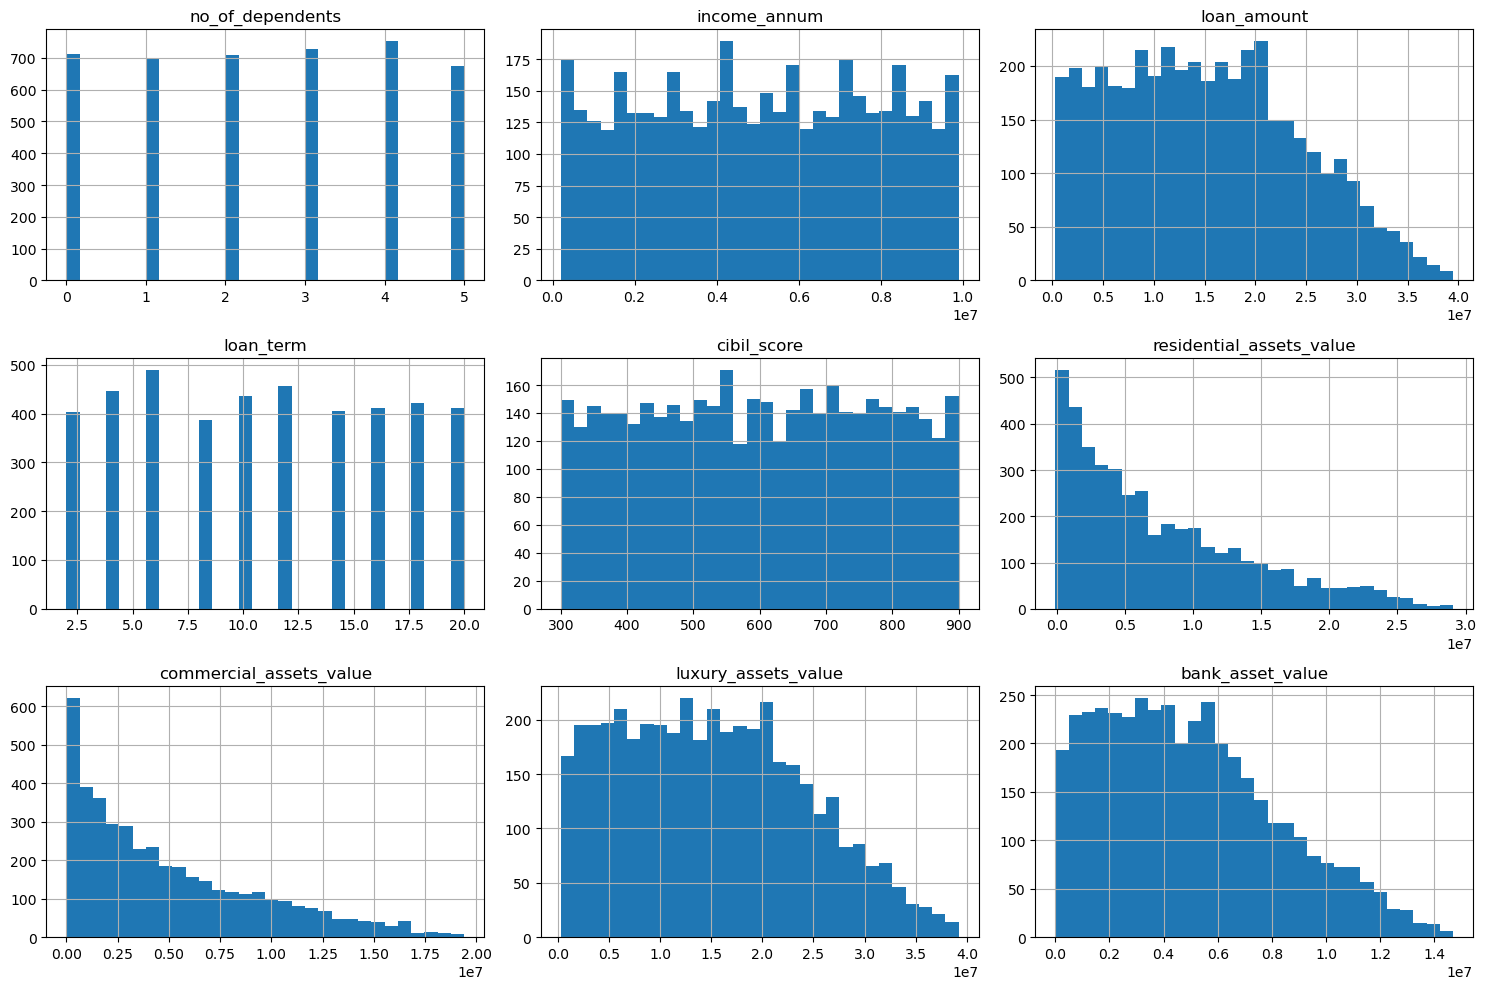

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11060\4135674877.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[numerical_cols + ['loan_status']].corr()


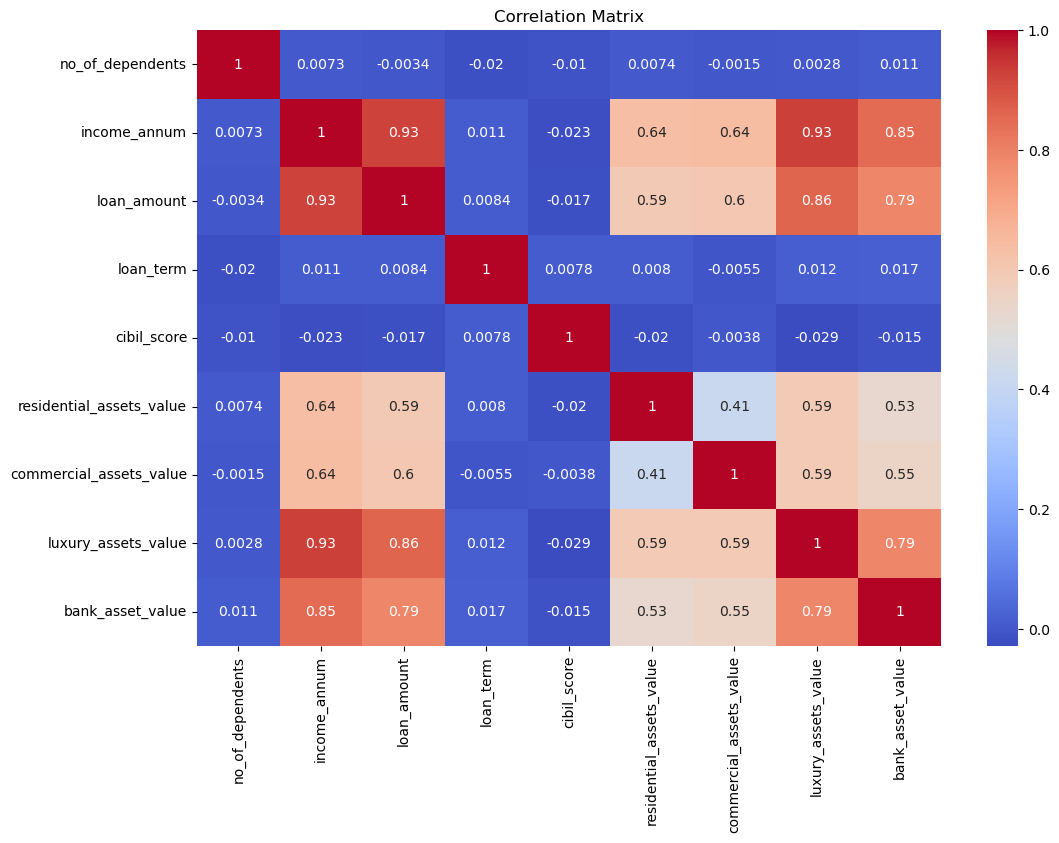

In [25]:
# Summary statistics
print(df[numerical_cols].describe())

# Distribution of numerical features
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols + ['loan_status']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

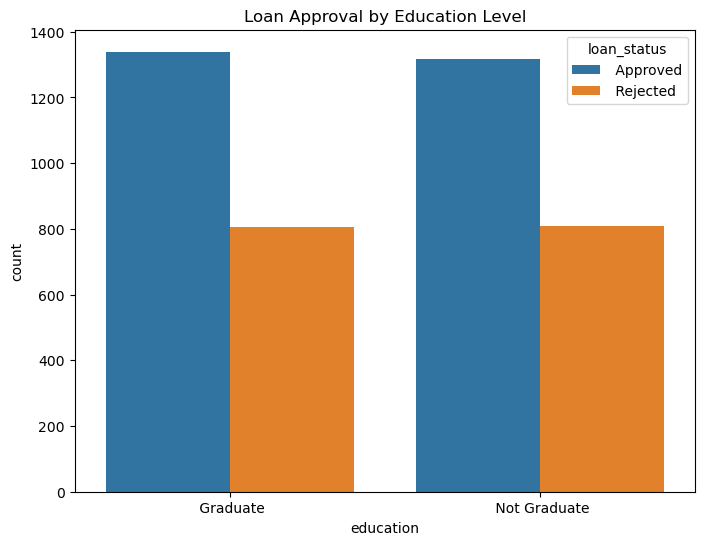

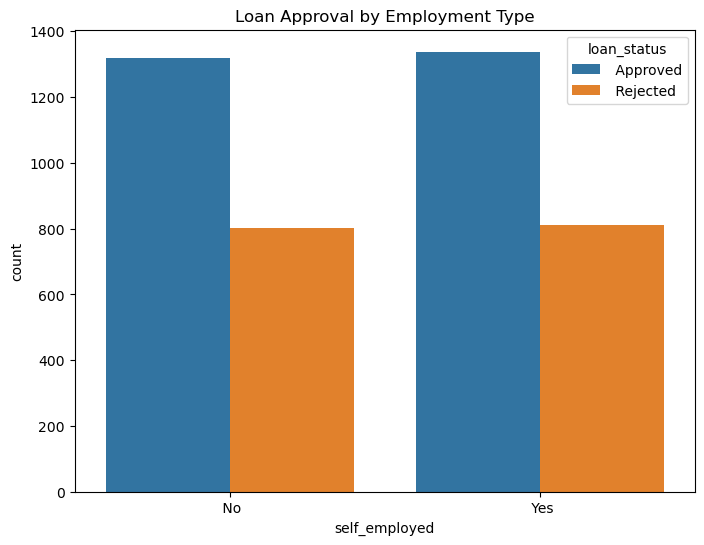

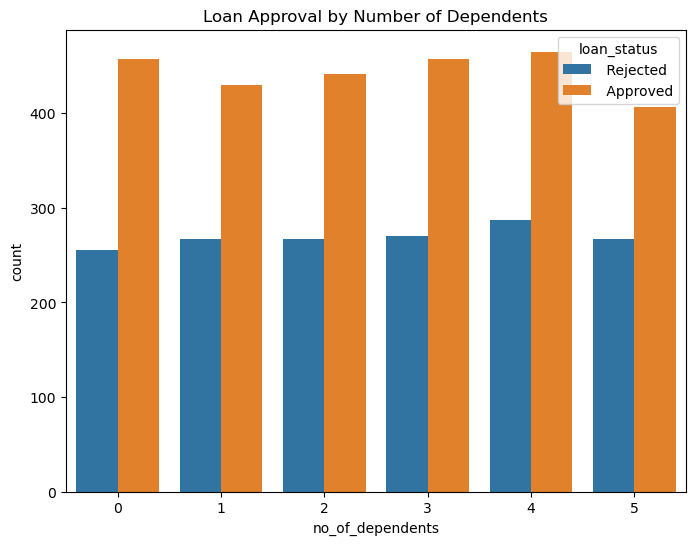

In [26]:
# Education vs loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education', hue='loan_status')
plt.title('Loan Approval by Education Level')
plt.show()

# Self-employed vs loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='self_employed', hue='loan_status')
plt.title('Loan Approval by Employment Type')
plt.show()

# Number of dependents vs loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='no_of_dependents', hue='loan_status')
plt.title('Loan Approval by Number of Dependents')
plt.show()

Modelling 

In [ ]:
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


categorical_features = ['education', 'self_employed']
numerical_features = [col for col in numerical_cols if col not in ['loan_id', 'loan_status']]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Combine preprocessing with model in a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Random Forest

Random Forest Classifier:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.99       531
    Rejected       0.99      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy: 0.9812646370023419


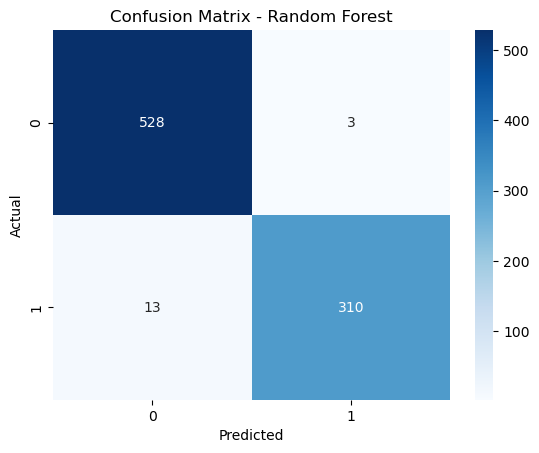

In [29]:
# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression

Logistic Regression:
              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       531
    Rejected       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854

Accuracy: 0.9227166276346604


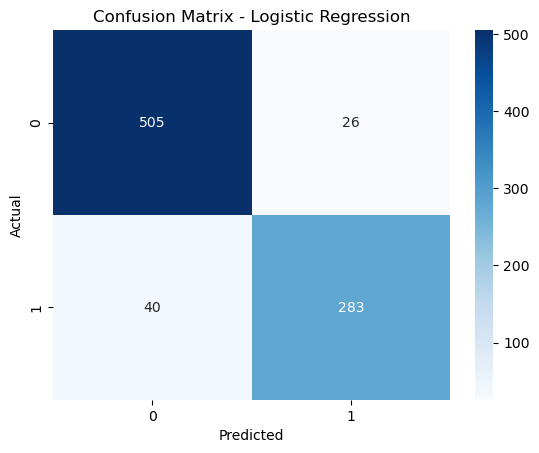

In [30]:
# Change the classifier in the pipeline
pipeline.set_params(classifier=LogisticRegression(max_iter=1000))

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred_lr = pipeline.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
#Hyper parameter tuning for random forest
# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Change back to Random Forest
pipeline.set_params(classifier=RandomForestClassifier(random_state=42))

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Optimized Random Forest:")
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))

Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score: 0.98
Optimized Random Forest:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.99       531
    Rejected       0.99      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy: 0.9824355971896955


Since RandomForest performed best, we will use it as the main model

In [33]:
#Let's evaluate it more thoroughly.

# Cross-validated accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated accuracy: 0.98 (+/- 0.01)


**Saving the file**  

In [ ]:
import joblib

# Save the best model from previous training
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'loan_approval_model.pkl')

# Also save the column names for the features used in training
import json
feature_columns = {
    'numerical': numerical_features,
    'categorical': categorical_features
}
with open('feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)